# SML Exercise -- Perceptron Regression and Regularization

In [1]:
#Imports:
import numpy as np

In [2]:
# 1) Write a function called ‘score’ according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of a single sample in a length two NumPy array 𝐱.
# Output: the 𝑧-value (score) of the sample.
# Procedure: calculate and return 𝑧=𝐰∙𝐱+𝑏.

def score(w, b, x):
    return np.dot(x, w) + b

In [3]:
# 2) Write a function called ‘step’ which implements the step function Θ:
# Input: a number 𝑧.
# Output: Θ(𝑧).
# Procedure: follow definition of the step function.

def step(z):
    if z >= 0:
        return 1
    else:
        return 0

In [4]:
# 3) Write a function called ‘predict’ according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of a single sample in a length two NumPy array 𝐱.
# Output: a prediction of 1 or 0.
# Procedure:
#  · Calculate 𝑧 using the ‘score’ function.
#  · Use the ‘step’ function to find Θ(𝑧).
#  · Return Θ(𝑧).

def predict(w, b, x):
    return step(score(w, b, x))

In [5]:
# 4) Write a function called ‘error’ which returns the error for a single point according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of a single sample in a length two NumPy array 𝐱, label of a single sample 𝑦.
# Output: error contribution of a point
# Procedure:
#  · Find the prediction using the ‘predict’ function
#  · Return the error:
#     · 0 if the prediction is correct.
#     · |Θ(𝑧)| if the prediction is incorrect.

def error(w, b, x, y):
    prediction = predict(w, b, x)
    if prediction == y:
        return 0
    else:
        return np.abs(score(w, b, x))

In [6]:
# 5) Write a function called ‘mean_perceptron_error’ which returns the average error for all points according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of all samples NumPy array 𝐗 with two columns and an arbitrary number of rows, a NumPy array 𝑌 with a label for each sample.
# Output: the mean perceptron error.
# Procedure:
#  · Calculate the error for each sample:
#     · 0 if the prediction is correct.
#     · |Θ(𝑧)| if the prediction is incorrect.
#  · Calculate and return the average error over all of the samples.

def mean_perceptron_error(w, b, X, Y):
    total = 0
    for i in range(len(X)):
        total += error(w, b, X[i], Y[i])
    return total/len(X)

In [7]:
# 6) Enter the following data:

X = np.array([[1, 0], [0, 1], [1, 3], [3, 2]])
Y = np.array([0, 1, 1, 0])
w = np.array([1, 2])
b = -4

In [8]:
# Use each sample of data, and the given weights and bias, to test each function.
#Score Function
for i in range(len(Y)):
    print(f'Score: {score(w, b, X[i])}')

#Predict Function
for i in range(len(Y)):
    print(f'Prediction: {predict(w, b, X[i])}')

#Error Function
for i in range(len(Y)):
    print(f'Error: {error(w, b, X[i], Y[i])}')

#Mean Perceptron Error Function
print(f'Mean Perceptron Error: {mean_perceptron_error(w, b, X, Y)}')

Score: -3
Score: -2
Score: 3
Score: 3
Prediction: 0
Prediction: 0
Prediction: 1
Prediction: 1
Error: 0
Error: 2
Error: 0
Error: 3
Mean Perceptron Error: 1.25


# SML Excercise -- Perceptron Training and Validation

In [9]:
# Imports:
import matplotlib.pyplot as plt
import random
import utils
import turicreate as tc

In [10]:
# 1) Write a function called ‘trick’ according to the following pseudocode:
# Input: a NumPy array with length two of weights 𝐰, bias 𝑏, the features of a single sample in a length two NumPy array 𝐱, a label 𝑦, and a learning rate with default value 𝜂=0.01.
# Output: updated weights 𝐰 and bias 𝑏.
# Procedure:
#  · If 𝑦̂=1 and 𝑦=0:
#      𝐰=𝐰−𝜂𝐱
#      𝑏=𝑏−𝜂
#  · If 𝑦̂=0 and 𝑦=1:
#      𝐰=𝐰+𝜂𝐱
#      𝑏=𝑏+𝜂
#  · Return 𝐰 and bias 𝑏

def trick(w, b, x, y, n = 0.01):
    p = predict(w, b, x)
    if p == y:
        return w, b
    else:
        if y==1 and p==0:
            for i in range(len(w)):
                w[i] += x[i]*n
            b += n
        elif y==0 and p==1:
            for i in range(len(w)):
                w[i] -= x[i]*n
            b -= n
        return w, b

In [11]:
# 2) Write a function called ‘perceptron_algorithm’ according to the following pseudocode:
# Input: the features of all samples in a NumPy array 𝐗, a label for each sample as a NumPy array 𝑌, a learning rate with default value 𝜂=0.01, the number of epochs with default value epochs=500.
# Output: updated weights 𝐰 and bias 𝑏, a list containing the error after each epoch.
# Procedure:
#  · Set random values for 𝐰 and 𝑏 from a uniform distribution over the interval [−1,1).
#  · Create a blank list called ‘errors’ to hold the error values.
#  · For each epoch in range(epochs):
#      · Calculate the mean_perceptron_error and append the value to errors.
#      · Choose a random index number for a sample (row) in 𝐗.
#      · Update the weights 𝐰 and bias 𝑏 using the trick function.
#  · Return 𝐰, 𝑏, and errors.

def perceptron_algorithm(X, Y, n = 0.01, epochs = 500):
    utils.plot_points(X, Y)
    w = [1.0 for i in range(len(X[0]))]
    b = 0.0
    errors = []
    for epoch in range(epochs):
        utils.draw_line(w[0], w[1], b, color='grey', linewidth=1.0, linestyle='dotted')
        error = mean_perceptron_error(w, b, X, Y)
        errors.append(error)
        i = random.randint(0, len(X) - 1)
        w, b = trick(w, b, X[i], Y[i], n)
    utils.draw_line(w[0], w[1], b)
    plt.show()
    plt.scatter(range(epochs), errors)
    return w, b, errors

In [29]:
# 3) Hardcode the features 𝐗 and the labels 𝑌 in NumPy arrays, taking values from the table below:

X = np.array([[3, 3], [1, 0], [0, 2], [1, 1], [1, 2], [0, 1], [1, 3], [2, 2], [2, 3], [3, 2]])
Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

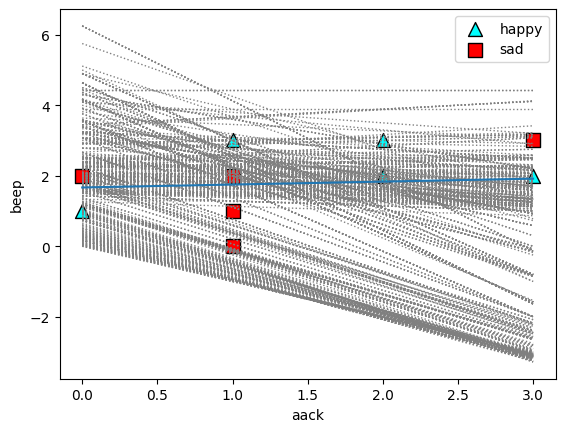

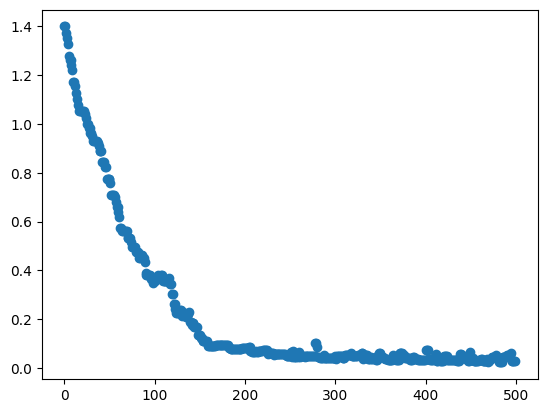

In [18]:
# 4) Train a perceptron model using the perceptron_algorithm function. 
# Plot the best fit line along with the datapoints. Plot the errors vs. epochs.

w, b, errors = perceptron_algorithm(X, Y)

In [14]:
# 5) Add a markdown cell to discuss how well the model fits and make observations about the plots. 
# Could training have stopped at an earlier number of epochs?

**Explanation:**

**Model Fit:**

1. The perceptron model appears to have learned a decision boundary that separates the two classes reasonably well.
   The best-fit line seems to correctly classify most of the data points, with only a few misclassifications.

**Error Plot:**

2. The error plot shows a steep decline in error values initially, which then levels off as the number of epochs increases.

**Early Stopping:**

3. Based on the first graph, it is evident that some of the gray lines were more optimal than the final blue line of best fit. If training could have stopped earlier, one of those gray lines might have provided a better separation, resulting in fewer misclassifications.

In [25]:
datadict = {'aack': X[:,0], 'beep':X[:,1], 'labels': Y}
data = tc.SFrame(datadict)
print(data)

perceptron = tc.logistic_classifier.create(data, target='labels')
class_predictions = perceptron.predict(data, output_type='class')
print(tc.evaluation.confusion_matrix(data['labels'], class_predictions))

+------+------+--------+
| aack | beep | labels |
+------+------+--------+
|  3   |  3   |   0    |
|  1   |  0   |   0    |
|  0   |  2   |   0    |
|  1   |  1   |   0    |
|  1   |  2   |   0    |
|  0   |  1   |   1    |
|  1   |  3   |   1    |
|  2   |  2   |   1    |
|  2   |  3   |   1    |
|  3   |  2   |   1    |
+------+------+--------+
[10 rows x 3 columns]



Logistic regression:

--------------------------------------------------------

Number of examples          : 10

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.002315     | 0.700000          |

| 2         | 3        | 0.005199     | 0.700000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|      0       |        1        |   2   |
|      0       |        0        |   3   |
|      1       |        0        |   1   |
|      1       |        1        |   4   |
+--------------+-----------------+-------+
[4 rows x 3 columns]



In [28]:
# 6) Write code to:
#  · Compare predictions with labels and determine the number of true 
#    positives, true negatives, false positives, and false negatives.
#  · Calculate and display recall, precision, and 𝐹1 score.

# +----+----+      +---+---+
# | TP | FN |      | 4 | 1 |
# +----+----+  ->  +---+---+
# | FP | TN |      | 2 | 3 |
# +----+----+      +---+---+

print('Recall:', tc.evaluation.recall(data['labels'], class_predictions))
print('Precision:', tc.evaluation.precision(data['labels'], class_predictions))
print('F1 Score:', tc.evaluation.fbeta_score(data['labels'], class_predictions, beta=1))

Recall: 0.8
Precision: 0.6666666666666666
F1 Score: 0.7272727272727272
